# AS 1 - Regression (normal equation)

Richard Yang

### Part A: Data Cleaning & Exploratory Analysis

In [1]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# Read the data
df = pd.read_csv('bottle.csv')
df.head()


C:\Users\Richa\AppData\Local\Temp\ipykernel_6184\1402465388.py:8: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# print data shape of df
shape = df.shape
print(shape)


(864863, 74)


In [3]:
#2 
columns = ['T_degC', 'Salnty', 'STheta']
df = df[columns]
df.dropna(inplace=True)
df.head()
print(df.shape)

(812174, 3)


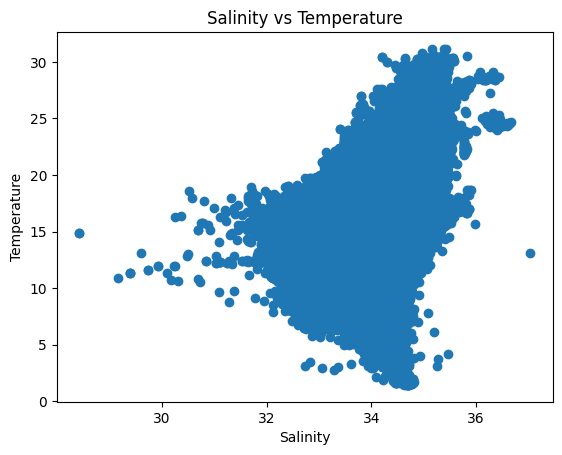

In [4]:
#3a
import matplotlib.pyplot as plt

# Plot the data
plt.scatter(df['Salnty'], df['T_degC'])

plt.title('Salinity vs Temperature')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.show()

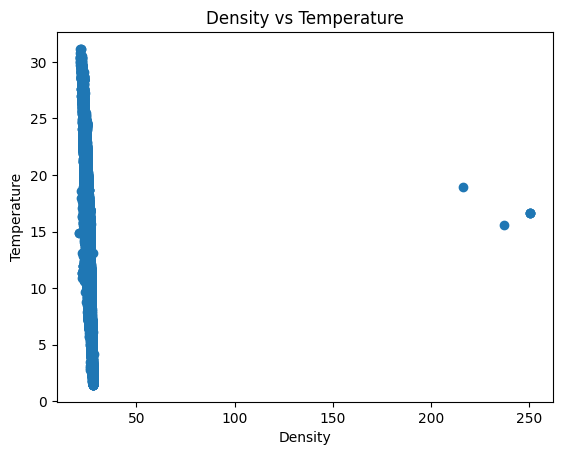

In [5]:
# 3b Plot the data
plt.scatter(df['STheta'], df['T_degC'])
plt.title('Density vs Temperature')
plt.xlabel('Density')
plt.ylabel('Temperature')
plt.show()


C:\Users\Richa\AppData\Local\Temp\ipykernel_6184\344952471.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['T_degC'], hist=True)


<AxesSubplot:xlabel='T_degC', ylabel='Density'>

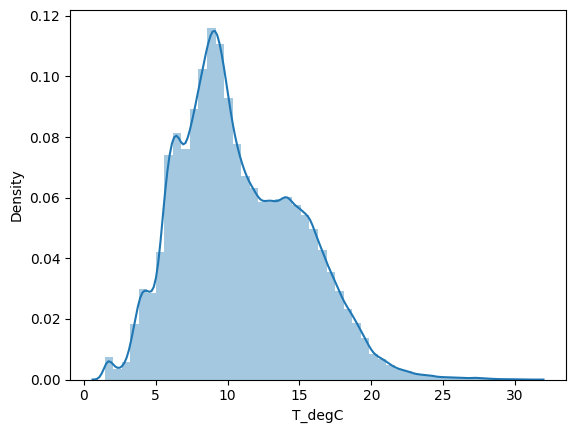

In [6]:
#4 
import seaborn as sns
# distribution plot of T_degC using Seaborn

sns.distplot(df['T_degC'], hist=True)

In [7]:
# 5
# Remove obvious outliers from step 3b

# Remove obvious outliers where density is larger than 200

df = df[df['STheta'] < 200]
df.shape

(812168, 3)

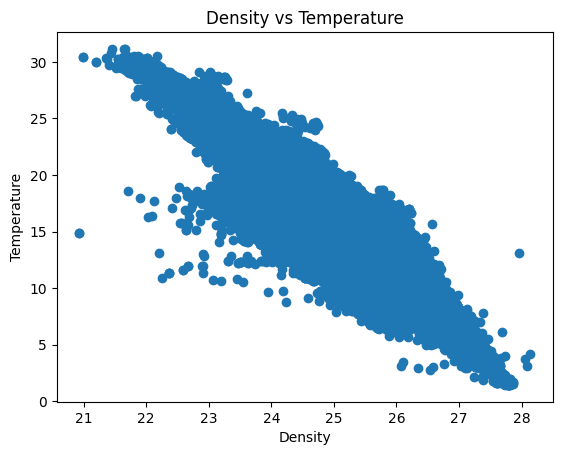

In [8]:
plt.scatter(df['STheta'], df['T_degC'])
plt.title('Density vs Temperature')
plt.xlabel('Density')
plt.ylabel('Temperature')
plt.show()


## Part B: Train & Test Split:

In [9]:
import sklearn
from sklearn.model_selection import train_test_split

X = df[['Salnty', 'STheta']]
y = df['T_degC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((568517, 2), (243651, 2), (568517,), (243651,))

## Part C: Linear Regression Using Normal Equation

In [10]:
#1 and 2
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X_train)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train
theta_best

array([35.7866609 ,  3.10473642, -5.03570065])

         Salnty   STheta
793846  33.4050  25.0420
832324  34.2774  26.8266
743855  32.8630  24.8160
807692  33.4030  24.5430
143504  34.5300  27.1170
...         ...      ...
780704  33.7770  25.9530
526400  32.7980  24.7440
725565  34.2830  27.0180
577622  34.1260  26.8610
802490  33.3640  25.5780

[243651 rows x 2 columns]


In [12]:
# 3

X_new_b = add_dummy_feature(X_test)  # add x0 = 1 to each instance
y_pred = X_new_b @ theta_best
print(y_pred)
print(X_new_b)


[13.39636508  7.11822574 12.85166629 ...  6.17177916  6.47494055
 10.56993534]
[[ 1.     33.405  25.042 ]
 [ 1.     34.2774 26.8266]
 [ 1.     32.863  24.816 ]
 ...
 [ 1.     34.283  27.018 ]
 [ 1.     34.126  26.861 ]
 [ 1.     33.364  25.578 ]]


In [13]:
print(y_test)

793846    13.580
832324     7.245
743855    12.610
807692    15.900
143504     6.550
           ...  
780704    10.270
526400    12.720
725565     5.790
577622     6.050
802490    10.580
Name: T_degC, Length: 243651, dtype: float64


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
Var = explained_variance_score(y_test, y_pred)
dict = {'MSE': [MSE], 'R2': [R2], 'Var': [Var]}
dfdict = pd.DataFrame(dict)
dfdict


,MSE,R2,Var
0,0.23167,0.986986,0.986986


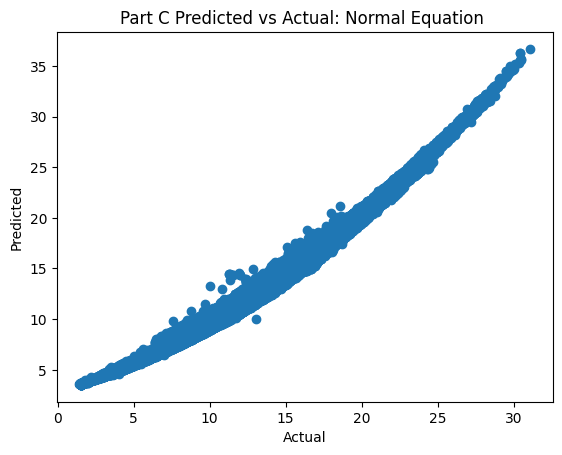

In [15]:
plt.figsize=(10,10)

plt.scatter(y_test, y_pred)
plt.title('Part C Predicted vs Actual: Normal Equation ')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


## Part D: Using sklearn API

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(35.786660898222465, array([ 3.10473642, -5.03570065]))

In [17]:
y_pred_sklearn = lin_reg.predict(X_test)
MSE_sklearn = mean_squared_error(y_test, y_pred_sklearn)
R2_sklearn = r2_score(y_test, y_pred_sklearn)
Var_sklearn = explained_variance_score(y_test, y_pred_sklearn)
dict = {'MSE': [MSE_sklearn], 'R2': [R2_sklearn], 'Var': [Var_sklearn]}
dfdict = pd.DataFrame(dict)
dfdict

,MSE,R2,Var
0,0.23167,0.986986,0.986986


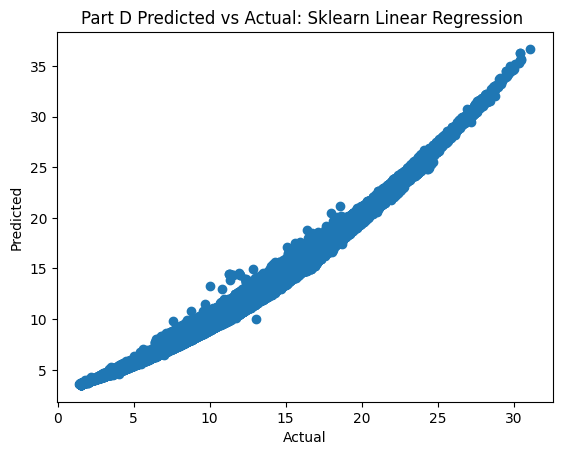

In [18]:
plt.figsize=(10,10)

plt.scatter(y_test, y_pred_sklearn)
plt.title('Part D Predicted vs Actual: Sklearn Linear Regression ')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Part E: Conceptual Questions

1. Why is it important to have a test set?

-- A test set allows you to evaluate the performance of your model on unseen data, which is critical to understanding how well the model will perform in real-world scenarios.

-- By using a test set, you can determine if your model is overfitting and adjust it accordingly.

-- By using a test set, you can adjust the hyperparameters to optimize the model's performance on new data.


2. If the normal equation always provides a solution, when would we not want to use it?

Large Datasets: The normal equation requires the inversion of a matrix, which can be computationally expensive for large datasets. In these cases, it may be more efficient to use iterative algorithms such as gradient descent to optimize the parameters.

Nonlinear Models: The normal equation is only applicable to linear regression models, which assume a linear relationship between the independent and dependent variables. If the relationship is nonlinear, then the normal equation would not provide a suitable solution, and alternative methods such as polynomial regression or nonlinear regression would need to be used.

Regularization: The normal equation does not include regularization, which is a technique used to prevent overfitting by adding a penalty term to the cost function. Regularization can help improve the generalization performance of the model, especially when dealing with high-dimensional datasets.

Missing Values: The normal equation assumes that there are no missing values in the dataset. If there are missing values, then the normal equation cannot be applied directly, and imputation or other techniques may need to be used to fill in the missing values.

3. How might we improve the fit of our models from Part C & D?

Feature Engineering: One way to improve the fit of a linear regression model is to engineer new features that better capture the relationship between the independent and dependent variables. This could include creating polynomial features, interaction terms, or other transformations that better capture the underlying patterns in the data.

Regularization: Regularization is a technique used to prevent overfitting by adding a penalty term to the cost function. Ridge regression and Lasso regression are two popular regularization techniques that can be applied to linear regression models. These techniques can help improve the generalization performance of the model and reduce the variance of the estimates.

Handling Outliers: Outliers in the data can have a significant impact on the fit of a linear regression model. One way to handle outliers is to remove them from the dataset, but this must be done with caution to avoid biasing the model. Another approach is to use robust regression methods such as RANSAC or Theil-Sen regression that are less sensitive to outliers.

Choosing Appropriate Hyperparameters: Linear regression models can have hyperparameters that need to be tuned, such as the regularization strength, learning rate, or the degree of the polynomial features. Choosing appropriate hyperparameters can significantly impact the performance of the model.

Using Nonlinear Models: If the relationship between the independent and dependent variables is nonlinear, linear regression may not be the best option. Nonlinear regression models such as polynomial regression, spline regression, or decision tree regression may provide better fits in these cases.

4. As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff. 

Bias is the difference between the expected value of the model's predictions and the true values. A model with high bias tends to underfit the data, meaning that it oversimplifies the problem and misses important patterns or relationships in the data.

Variance is the variability in the model's predictions for different training sets. A model with high variance tends to overfit the data, meaning that it learns to fit the noise or idiosyncrasies of the training data rather than generalizing to new, unseen data.

5. In a linear regression model, how might we reduce bias?

Add More Features 

Increase Model Complexity 

Regularization: to prevent overfitting by adding a penalty term to the cost function. 

Cross-validation to estimate the bias and variance of the model and select the best model that balances both sources of error.



6. In a linear regression model, how might we reduce variance? 

Regularization: adding a penalty term to the cost function

Feature Selection: reduce the noise in the training data and prevent overfitting.

Data augmentation: increase the size of the training data by creating new samples from the existing data. This can help to reduce variance by increasing the diversity of the training data and reducing the impact of noise.

Cross-validation: we can select the model that has the lowest variance while still maintaining a reasonable level of bias.
